In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.3 MB


In [5]:
df.isnull().sum()

carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<AxesSubplot:>

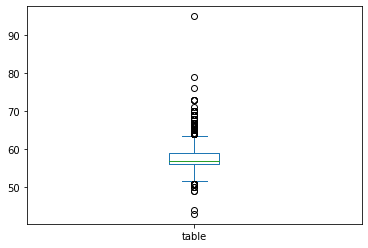

In [7]:
df.table.plot(kind = "box")
# pandas.plot

<AxesSubplot:xlabel='table'>

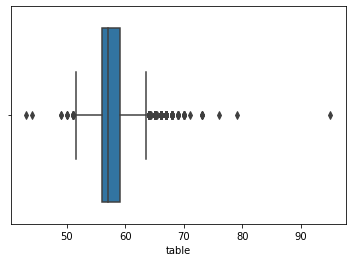

In [8]:
sns.boxplot(x = df.table)
# seaborn.plot

In [9]:
df_table = df.table
df_table

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [10]:
type(df_table)

pandas.core.series.Series

In [11]:
df_table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [12]:
df_table.quantile(1)
# maximum value

95.0

In [13]:
df_table.quantile(0.75)
# Q3

59.0

In [13]:
df_table.quantile(0.25)
# Q1

56.0

In [14]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1
IQR

3.0

In [15]:
# pandas IQR
IQR = df_table.quantile(0.75) - df_table.quantile(0.25)
IQR

3.0

In [16]:
# numpy
IQR = np.percentile(df_table, 75) - np.percentile(df_table, 25)
IQR

3.0

In [17]:
# scipy
from scipy import stats
IQR = stats.iqr(df_table)
IQR

3.0

In [18]:
lower_lim = Q1 - 1.5*IQR
lower_lim

51.5

In [19]:
upper_lim = Q3 + 1.5*IQR
upper_lim

63.5

In [20]:
df_table > upper_lim

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [21]:
df_table < lower_lim

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [22]:
(df_table < lower_lim).value_counts()

False    53924
True        16
Name: table, dtype: int64

In [23]:
(df_table > upper_lim).value_counts()

False    53351
True       589
Name: table, dtype: int64

In [24]:
df_table[(df_table > upper_lim)]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 589, dtype: float64

In [25]:
df_table[(df_table < lower_lim)]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [26]:
df_table[(df_table < lower_lim) | (df_table > upper_lim)]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [27]:
not_outlier = (df_table >= lower_lim) & (df_table <= upper_lim)
not_outlier
# 51.5 <= X <= 63.5

0         True
1         True
2        False
3         True
4         True
         ...  
53935     True
53936     True
53937     True
53938     True
53939     True
Name: table, Length: 53940, dtype: bool

In [28]:
df_drop_outlier =  df[not_outlier]
df_drop_outlier

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [29]:
df[(df.table >= lower_lim) & (df.table <= upper_lim)] 

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [30]:
df[~((df.table >= lower_lim) & (df.table <= upper_lim))] 

,carat,depth,table,price,x,y,z
2,0.23,56.9,65.0,327,4.05,4.07,2.31
91,0.86,55.1,69.0,2757,6.45,6.33,3.52
145,0.70,62.1,64.0,2767,5.62,5.65,3.50
219,0.53,57.5,64.0,2782,5.34,5.37,3.08
227,0.84,55.1,67.0,2782,6.39,6.20,3.47
...,...,...,...,...,...,...,...
53695,0.75,59.7,65.0,2717,5.85,5.80,3.48
53697,0.70,64.5,65.0,2717,5.52,5.45,3.54
53756,0.84,55.6,64.0,2724,6.42,6.32,3.54
53757,0.72,55.4,64.0,2724,6.06,5.97,3.34


In [31]:
df_table.loc[df_table > upper_lim] = upper_lim
df_table

0        55.0
1        61.0
2        63.5
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [32]:
df_table.loc[df_table < lower_lim] = lower_lim
df_table

0        55.0
1        61.0
2        63.5
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

<AxesSubplot:>

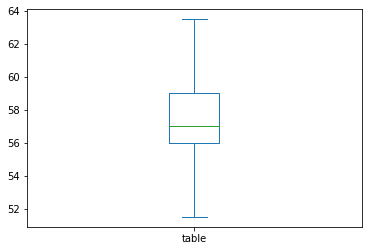

In [33]:
df_table.plot(kind="box")

<AxesSubplot:xlabel='table'>

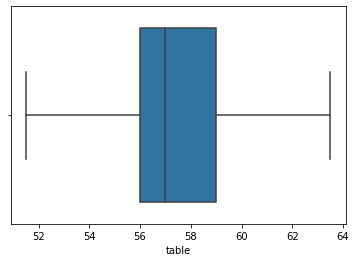

In [34]:
sns.boxplot(x=df_table)

# scipy - winsorize

In [35]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [36]:
from scipy.stats.mstats import winsorize

df_win = winsorize(df.table, (0.01, 0.01))
df_win

# it will replace one percent of outliers from both sides

masked_array(data=[55., 61., 64., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

In [37]:
df_win.sort()
df_win

# one percent value on the left (500) were equated to 53
# one percent value on the right were equated to 64
# also changed non-outlier values

masked_array(data=[53., 53., 53., ..., 64., 64., 64.],
             mask=False,
       fill_value=1e+20)

In [38]:
len(df[df.table < lower_lim]) / len(df)
# percentage of outliers

0.00029662588060808305

In [39]:
len(df[df.table > upper_lim]) / len(df)
# percentage of outliers

0.010919540229885057

<AxesSubplot:>

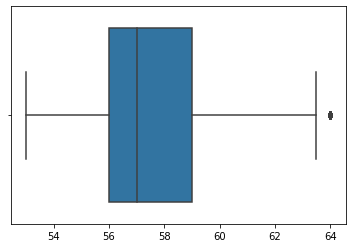

In [40]:
sns.boxplot(x=df_win)
# just 50 outliers were left and all outliers were changed on the left

<AxesSubplot:xlabel='table'>

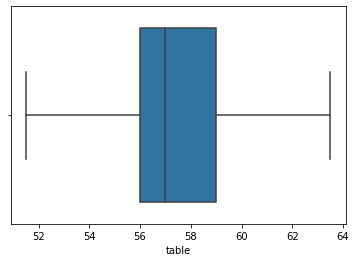

In [41]:
sns.boxplot(x=df_table)

In [ ]:
# drop outliers with log

In [42]:
df.carat

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

<AxesSubplot:ylabel='Frequency'>

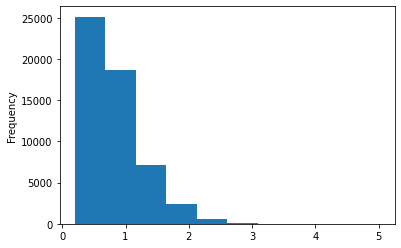

In [43]:
df.carat.plot(kind="hist")

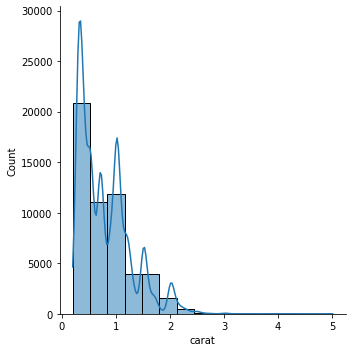

In [44]:
sns.displot(df.carat, bins=15, kde=True);

In [45]:
df["log_carat"] = np.log(df.carat)
df

,carat,depth,table,price,x,y,z,log_carat
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


<AxesSubplot:xlabel='log_carat'>

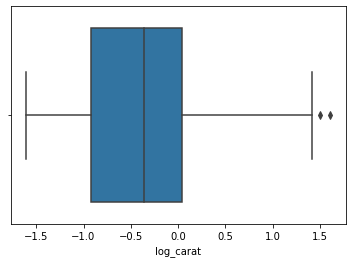

In [46]:
sns.boxplot(x=df.log_carat)

<AxesSubplot:xlabel='carat'>

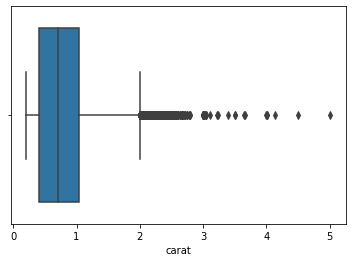

In [47]:
sns.boxplot(x=df.carat)

<AxesSubplot:xlabel='log_carat', ylabel='Count'>

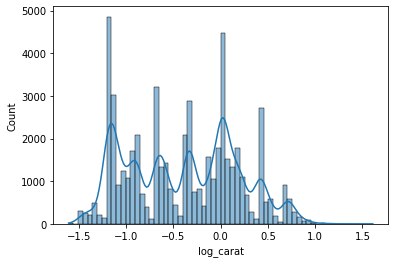

In [48]:
sns.histplot(x=df.log_carat, kde=True)

In [49]:
df_carat_log = df.log_carat

In [50]:
df["log_carat"] = np.log(df.carat)
df_carat_log = df.log_carat
Q1_log = df_carat_log.quantile(0.25)
Q3_log = df_carat_log.quantile(0.75)
IQR_log = Q3_log-Q1_log
IQR_log

0.9555114450274363

In [51]:
lower_lim_log = Q1_log - 1.5 * IQR_log
upper_lim_log = Q3_log + 1.5 * IQR_log

In [52]:
df.loc[df.log_carat > upper_lim_log, "log_carat"] = upper_lim_log
df

,carat,depth,table,price,x,y,z,log_carat
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


<AxesSubplot:xlabel='log_carat'>

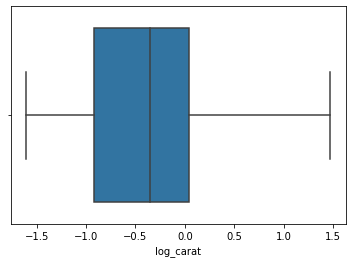

In [53]:
sns.boxplot(x=df.log_carat)